<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:96: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:96: SyntaxWarning: invalid escape sequence '\P'
C:\Users\bekab\AppData\Local\Temp\ipykernel_13660\4114332580.py:9: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("G:\ОАД\НИРС\Greenhouse_Plant_Growth_Metrics_WITH_MISSING.csv")
C:\Users\bekab\AppData\Local\Temp\ipykernel_13660\4114332580.py:96: SyntaxWarning: invalid escape sequence '\P'
  processed_df.to_csv("G:\ОАД\НИРС\Processed_Plant_Growth_Metrics.csv", index=False)



Анализ данных перед обработкой:
Размер датасета: (30000, 15)
Количество пропусков по столбцам:
Random        0
ACHP       1471
PHR        1525
AWWGV      1470
ALAP       1498
ANPL       1427
ARD        1505
ADWR       1472
PDMVG      1472
ARL        1458
AWWR          0
ADWV       1463
PDMRG      1527
Class       911
AWR       30000
dtype: int64

Уникальные значения в Class: ['SA' nan 'SB' 'SC' 'TA' 'TB' 'TC']
Уникальные значения в Random: ['R1' 'R2' 'R3']


c:\Users\bekab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\bekab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\bekab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


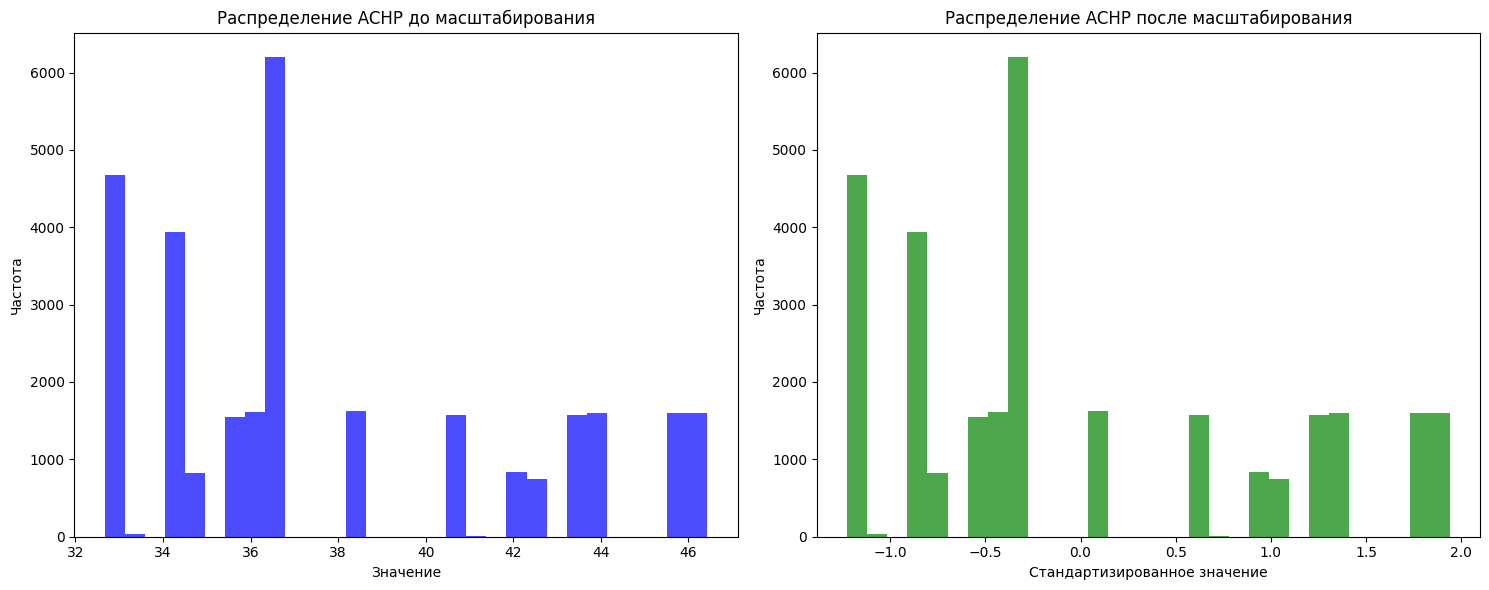


Результат обработки:
   cat__Class_SA  cat__Class_SB  cat__Class_SC  cat__Class_TA  cat__Class_TB  \
0       2.273829      -0.438545      -0.439031       -0.43822      -0.438761   
1       2.273829      -0.438545      -0.439031       -0.43822      -0.438761   
2       2.273829      -0.438545      -0.439031       -0.43822      -0.438761   
3       2.273829      -0.438545      -0.439031       -0.43822      -0.438761   
4       2.273829      -0.438545      -0.439031       -0.43822      -0.438761   

   cat__Class_TC  remainder__ACHP  remainder__PHR  remainder__AWWGV  \
0      -0.488252        -0.797030       -0.366599         -0.410614   
1      -0.488252        -0.807256       -0.366538         -0.401939   
2      -0.488252        -1.126786        0.702699         -0.589051   
3      -0.488252        -0.805118       -0.367278         -0.451011   
4      -0.488252        -0.391230       -1.134597          0.488853   

   remainder__ALAP  remainder__ANPL  remainder__ARD  remainder__ADWR  

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Загрузка данных с пропусками
try:
    df = pd.read_csv("G:\ОАД\НИРС\Greenhouse_Plant_Growth_Metrics_WITH_MISSING.csv")
except FileNotFoundError:
    print("Файл не найден! Проверьте путь.")
    exit()

# 2. Обработка пропусков
# --------------------------------------------
print("\nАнализ данных перед обработкой:")
print("Размер датасета:", df.shape)
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

# Проверка уникальных значений
print("\nУникальные значения в Class:", df['Class'].unique())
print("Уникальные значения в Random:", df['Random'].unique())

# Удаляем колонку Random
df.drop('Random', axis=1, inplace=True)

# Заполнение числовых пропусков
numerical_cols = ['ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 
                 'ADWR', 'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG']

for col in numerical_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Заполнение категориальных пропусков
if len(df['Class'].unique()) > 1:
    mode_class = df['Class'].mode()[0]
    df['Class'] = df['Class'].fillna(mode_class)
else:
    df.drop('Class', axis=1, inplace=True)

# 3. Кодирование категориальных признаков
# --------------------------------------------
categorical_cols = []
if 'Class' in df.columns and len(df['Class'].unique()) > 1:
    categorical_cols = ['Class']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

df_processed = preprocessor.fit_transform(df)

# 4. Масштабирование данных и визуализация
# --------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed)

# Визуализация распределения до и после масштабирования
plt.figure(figsize=(15, 6))

# Выбираем первый числовой признак для визуализации (можно изменить)
sample_col = 0 if len(categorical_cols) == 0 else len(df['Class'].unique())

plt.subplot(1, 2, 1)
plt.hist(df[numerical_cols[0]], bins=30, color='blue', alpha=0.7)
plt.title(f'Распределение {numerical_cols[0]} до масштабирования')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(scaled_data[:, sample_col], bins=30, color='green', alpha=0.7)
plt.title(f'Распределение {numerical_cols[0]} после масштабирования')
plt.xlabel('Стандартизированное значение')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# 5. Сохранение и вывод результатов
# --------------------------------------------
processed_df = pd.DataFrame(scaled_data, 
                          columns=preprocessor.get_feature_names_out())

print("\nРезультат обработки:")
print(processed_df.head())
print("\nПроверка пропущенных значений после обработки:")
print(processed_df.isnull().sum())

# Сохранение
try:
    processed_df.to_csv("G:\ОАД\НИРС\Processed_Plant_Growth_Metrics.csv", index=False)
    print("\nФайл успешно сохранен!")
except Exception as e:
    print(f"\nОшибка при сохранении файла: {e}")